# project about NBA stat

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)
nba_stat.tail()

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
621,621,Atlanta Hawks,82,25,57,0.305,48.1,91.0,35.1,81.3,...,42.9,19.0,16.7,7.7,4.7,6.3,22.7,0.1,-5.2,2000-01
622,622,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01
623,623,Washington Wizards,82,19,63,0.232,48.0,93.2,34.5,78.7,...,41.3,20.1,17.0,7.7,4.7,6.2,23.3,0.1,-6.7,2000-01
624,624,Golden State Warriors,82,17,65,0.207,48.2,92.5,35.8,87.5,...,45.5,21.8,15.9,9.0,5.0,6.0,21.1,0.1,-9.0,2000-01
625,625,Chicago Bulls,82,15,67,0.183,48.4,87.6,33.2,78.2,...,38.9,22.1,15.8,8.2,4.6,5.2,23.2,0.0,-9.1,2000-01


## 1.Checking data problems

In [93]:
nba_stat.isnull().sum()

teamstatspk    0
TEAM           0
GP             0
W              0
L              0
WIN%           0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
TOV            0
STL            0
BLK            0
BLKA           0
PF             0
PFD            0
+/-            0
SEASON         0
dtype: int64

In [94]:
nba_stat.dtypes

teamstatspk      int64
TEAM            object
GP               int64
W                int64
L                int64
WIN%           float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
BLKA           float64
PF             float64
PFD            float64
+/-            float64
SEASON          object
dtype: object

SEASON היא אובייקט, וכדי לעבוד עליו נהפוך אותו לאובייקט מסוג דאטה טיים.

In [96]:
#nba_stat['SEASON']=nba_stat['SEASON'].str.split("-")
#nba_stat['SEASON']=nba_stat['SEASON'].iloc[0:3]
#nba_stat['SEASON']

In [97]:
nba_stat.tail(30)

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
596,596,Golden State Warriors,82,21,61,0.256,48.2,97.7,36.6,85.2,...,46.7,20.8,16.8,7.9,6.4,6.3,23.0,0.2,-5.4,2001-02
597,597,San Antonio Spurs,82,58,24,0.707,48.4,96.2,35.2,76.4,...,44.1,21.7,14.0,6.9,7.0,5.2,18.9,0.0,7.8,2000-01
598,598,Los Angeles Lakers,82,56,26,0.683,48.5,100.6,37.9,81.5,...,44.7,23.0,14.4,6.9,6.0,4.0,22.8,0.1,3.4,2000-01
599,599,Philadelphia 76ers,82,56,26,0.683,48.4,94.7,35.4,79.1,...,44.8,20.6,15.8,8.4,5.0,5.6,20.4,0.0,4.3,2000-01
600,600,Sacramento Kings,82,55,27,0.671,49.0,101.7,38.2,85.0,...,45.0,22.6,14.9,9.7,5.3,5.8,19.5,0.0,5.8,2000-01
601,601,Dallas Mavericks,82,53,29,0.646,48.3,100.5,37.6,81.9,...,41.5,21.2,13.9,7.5,6.0,4.6,23.3,0.1,4.3,2000-01
602,602,Utah Jazz,82,53,29,0.646,48.2,97.1,36.1,76.7,...,40.6,25.7,15.8,8.1,5.6,5.5,25.7,0.1,4.7,2000-01
603,603,Milwaukee Bucks,82,52,30,0.634,48.2,100.7,38.0,82.9,...,42.4,22.5,13.7,8.2,4.7,4.3,23.5,0.1,3.9,2000-01
604,604,Phoenix Suns,82,51,31,0.622,48.3,94.0,35.9,82.4,...,42.7,23.2,15.3,9.5,5.2,5.1,22.7,0.1,2.2,2000-01
605,605,Miami Heat,82,50,32,0.610,48.5,88.9,32.9,76.3,...,39.6,19.9,13.7,7.7,3.7,5.2,21.0,0.1,2.3,2000-01


שארלוט הצטרפה בעונת 2004-5 ולכן המספר לא מתחלק בשלושים.
לכן נוריד את העונות עד שהיא הצטרפה.


In [98]:
nba_stat=nba_stat[:510]
nba_stat

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,505,Portland Trail Blazers,82,27,55,0.329,48.1,92.9,35.3,78.3,...,41.1,21.0,16.0,7.1,6.6,5.0,20.8,0.1,-4.0,2004-05
506,506,Utah Jazz,82,26,56,0.317,48.2,93.0,34.5,76.8,...,40.1,22.3,15.8,6.6,4.6,5.8,26.7,0.0,-4.3,2004-05
507,507,Charlotte Bobcats,82,18,64,0.220,48.5,94.3,36.1,83.6,...,41.7,21.9,14.5,8.5,5.4,5.4,23.1,0.0,-6.0,2004-05
508,508,New Orleans Hornets,82,18,64,0.220,48.6,88.4,33.1,80.0,...,40.2,21.0,14.8,6.7,3.8,5.5,23.0,0.0,-7.1,2004-05


בדיקה שהדאטה בגבולות הגיוניים ואין חריגות

In [99]:
nba_stat.columns

Index(['teamstatspk', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-',
       'SEASON'],
      dtype='object')

In [100]:
features = ['TEAM','GP', 'W', 'L','WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','OREB','DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']
melted_nba_stat= pd.melt(nba_stat[features], id_vars = 'TEAM', value_vars = features)
melted_nba_stat

,TEAM,variable,value
0,Phoenix Suns,GP,52.0
1,Golden State Warriors,GP,53.0
2,Memphis Grizzlies,GP,55.0
3,Miami Heat,GP,54.0
4,Chicago Bulls,GP,53.0
...,...,...,...
13255,Portland Trail Blazers,+/-,-4.0
13256,Utah Jazz,+/-,-4.3
13257,Charlotte Bobcats,+/-,-6.0
13258,New Orleans Hornets,+/-,-7.1


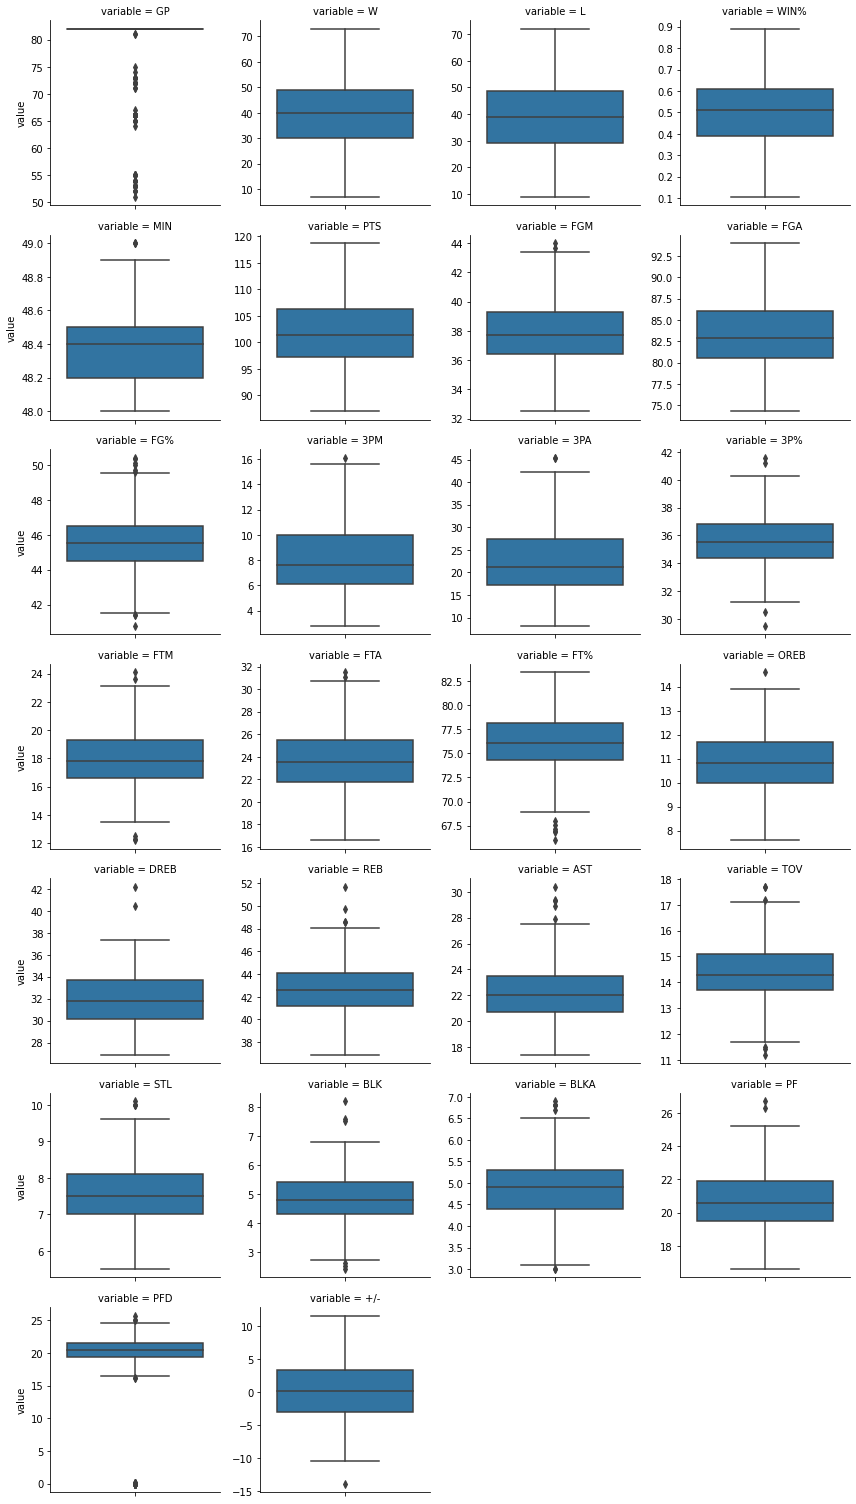

In [101]:
ans = sns.FacetGrid(data = melted_nba_stat, col="variable",  col_wrap=4,sharey=False)
ans.map_dataframe(sns.boxplot, y = 'value')

אין נתונים חריגים חוץ ממספר משחקים ששוחקו, ההסבר לנתון זה הוא בגלל שיש עונות שמספר המשחקים בהן היה שונה, אך זה לא משפיע על חישובים כי כל החישובים נעשים פר משחק.

In [102]:
nba_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teamstatspk  510 non-null    int64  
 1   TEAM         510 non-null    object 
 2   GP           510 non-null    int64  
 3   W            510 non-null    int64  
 4   L            510 non-null    int64  
 5   WIN%         510 non-null    float64
 6   MIN          510 non-null    float64
 7   PTS          510 non-null    float64
 8   FGM          510 non-null    float64
 9   FGA          510 non-null    float64
 10  FG%          510 non-null    float64
 11  3PM          510 non-null    float64
 12  3PA          510 non-null    float64
 13  3P%          510 non-null    float64
 14  FTM          510 non-null    float64
 15  FTA          510 non-null    float64
 16  FT%          510 non-null    float64
 17  OREB         510 non-null    float64
 18  DREB         510 non-null    float64
 19  REB     

## Looking for correlations

In [103]:
nba_stat_cut=nba_stat[['W', 'L','TEAM', 'WIN%', 'PTS', 'FGM','FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM','FTA', 'FT%','REB', 'AST','BLK', 'BLKA', 'PF', 'PFD', '+/-']].copy()
nba_stat_cut

,W,L,TEAM,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,...,FTM,FTA,FT%,REB,AST,BLK,BLKA,PF,PFD,+/-
0,42,10,Phoenix Suns,0.808,112.7,42.7,89.4,47.8,11.5,31.7,...,15.8,20.0,79.1,46.1,26.5,4.3,4.0,19.3,19.3,7.8
1,40,13,Golden State Warriors,0.755,110.9,40.4,86.5,46.7,14.6,40.1,...,15.5,20.3,76.4,46.5,27.5,4.9,4.1,20.3,17.7,8.3
2,37,18,Memphis Grizzlies,0.673,112.7,42.7,93.4,45.7,11.1,32.7,...,16.2,22.0,73.7,48.6,25.1,6.4,6.4,19.1,19.0,4.1
3,34,20,Miami Heat,0.630,108.7,39.3,85.7,45.9,13.5,36.1,...,16.5,20.2,81.5,44.6,25.9,3.3,4.4,20.5,20.0,4.2
4,33,20,Chicago Bulls,0.623,111.6,41.6,87.0,47.8,11.2,30.0,...,17.2,21.2,81.4,43.0,24.5,4.6,5.2,18.8,17.8,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,27,55,Portland Trail Blazers,0.329,92.9,35.3,78.3,45.1,5.1,14.2,...,17.2,23.7,72.5,41.1,21.0,6.6,5.0,20.8,0.1,-4.0
506,26,56,Utah Jazz,0.317,93.0,34.5,76.8,44.9,3.0,9.3,...,21.0,27.7,75.7,40.1,22.3,4.6,5.8,26.7,0.0,-4.3
507,18,64,Charlotte Bobcats,0.220,94.3,36.1,83.6,43.2,3.9,10.7,...,18.1,25.6,70.9,41.7,21.9,5.4,5.4,23.1,0.0,-6.0
508,18,64,New Orleans Hornets,0.220,88.4,33.1,80.0,41.5,5.1,16.0,...,17.1,22.3,76.6,40.2,21.0,3.8,5.5,23.0,0.0,-7.1


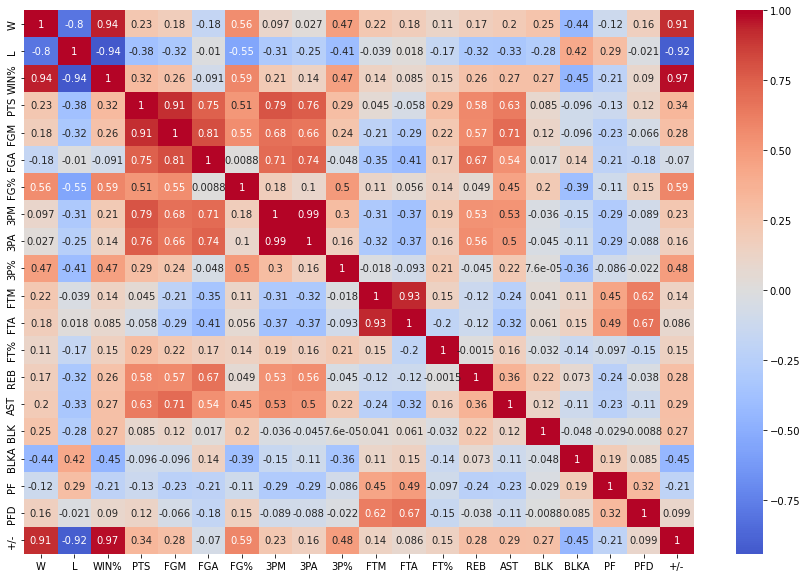

In [104]:
corrs = nba_stat_cut.corr(method = 'spearman')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

### 